# Hands-on altimetry tutorial

## 1. Visualization of altimetric data

## Authors

### Laura Gómez Navarro
IMEDEA (UIB-CSIC) and Utrecht University

email: laura.gomez@uib.es

### Paul Hargous
IMEDEA (UIB-CSIC)

email: hargous@imedea.uib-csic.es

# Index

    1) Conventional altimetry data

        1.1.) Data download

        1.2.) Conventional altimetry: along-track data

        1.3.) Conventional altimetry: Interpolated gridded maps

    2) SWOT

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 22.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import xarray as xr
from glob import glob
import datetime
import json

# 1.) Conventional altimetry data

## 1.1.) Data download

* Conventional altimetry, 1 Hz (L3 products):
    * DT: https://data.marine.copernicus.eu/product/SEALEVEL_EUR_PHY_L3_MY_008_061/description
        * Data user manual (PUM): Important to understand the different variables in the dataset https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-SL-PUM-008-032-068.pdf
        * As an example we choose 2 satellites:
            * Jason-3 (jn)
            * SARAL/Altika (alg)
* Interpolated gridded maps (L4 products):
    * xxx
   

We already downloaded the data for you and you can find it here:
https://nimbus.imedea.uib-csic.es/index.php/s/Wrtk6FXnKySDKoL

Follow these steps to be able to load the notebooks in the tutorials:

1) Download the data from: https://nimbus.imedea.uib-csic.es/index.php/s/Wrtk6FXnKySDKoL

2) Upload to your google drive main folder (My Drive) the Altimetry folder


## 1.2.) Conventional altimetry: along-track data

### 1.2.1.) Reading the data

We will use the xarray package. More information [here](https://xarray.dev/).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We define the file direcory where we have the data stored:
filedir = '../content/drive/MyDrive/Altimetry/L3/'

In [ ]:
# We obtain the list of files for each satellite:
## SARAL/Altika:
nfiles_s = sorted(glob(filedir + 'dt_europe_alg_phy_l3*nc'))
## Jason-3
nfiles_j = sorted(glob(filedir + 'dt_europe_j3n_phy_l3*nc'))

In [ ]:
# We explore the first file of the Jason-3 data:
nfile = nfiles_j[0]
# We load the data:
ds = xr.open_dataset(nfile)
# We explore the variables:
ds

<xarray.Dataset> Size: 246kB
Dimensions:         (time: 2934)
Coordinates:
  * time            (time) datetime64[ns] 23kB 2023-04-25T07:33:40.189073408 ...
    longitude       (time) float64 23kB ...
    latitude        (time) float64 23kB ...
Data variables:
    cycle           (time) int16 6kB ...
    track           (time) int16 6kB ...
    sla_filtered    (time) float64 23kB ...
    sla_unfiltered  (time) float64 23kB ...
    dac             (time) float64 23kB ...
    ocean_tide      (time) float64 23kB ...
    internal_tide   (time) float64 23kB ...
    lwe             (time) float64 23kB ...
    mdt             (time) float64 23kB ...
    tpa_correction  float64 8B ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea surface height measured by altimeter...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-3 sea su...
    time_coverage_duration:          P15H45M23.232268S
    time_coverage_end:               2023-04-25T23:19:03Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-04-25T07:33:40Z
    title:                           DT Jason-3 Interleaved European Seas Alo...

In [ ]:
# We explore the variables in detail:
print(ds.sla_filtered)

<xarray.DataArray 'sla_filtered' (time: 2934)> Size: 23kB
[2934 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 23kB 2023-04-25T07:33:40.189073408 ... 2...
    longitude  (time) float64 23kB ...
    latitude   (time) float64 23kB ...
Attributes:
    comment:        The sea level anomaly is the sea surface height above mea...
    long_name:      Sea level anomaly filtered not-subsampled with dac, ocean...
    standard_name:  sea_surface_height_above_sea_level
    units:          m


### 1.2.2.) Quick visualization

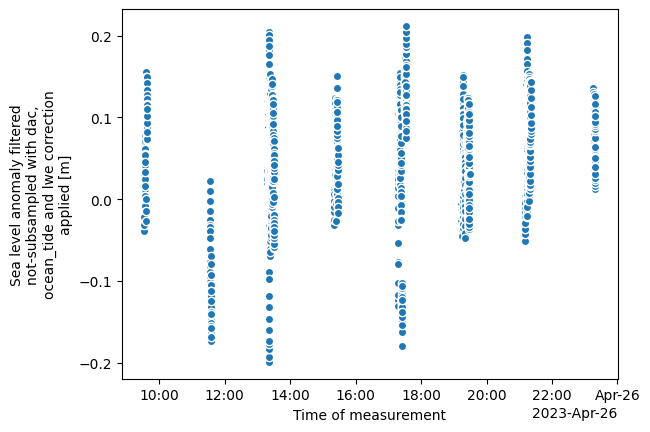

In [ ]:
# We can now do a quick plot:
ds.sla_filtered.plot.scatter()

This data is 1D, and the data on land appear as this gaps. We will next map the data so the that we can visualize it better.

### 1.2.3.) Plotting a map of the data

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


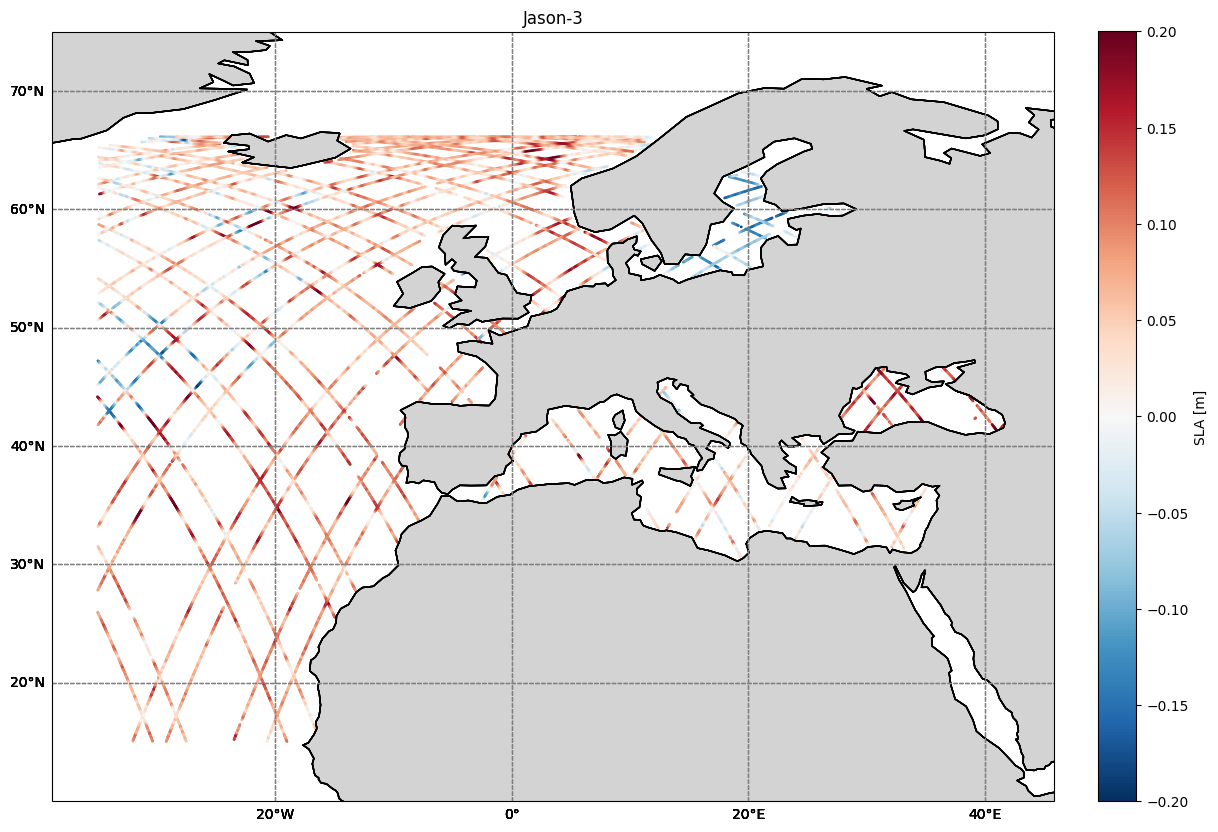

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

for nfile in nfiles_j:
    ds = xr.open_dataset(nfile)
    ax1.coastlines()
    ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
    gl.top_labels = gl.right_labels = False  # Disable top and right labels
    cc = ax1.scatter(ds.longitude, ds.latitude, s=1, c=ds.sla_filtered, vmin=-0.2, vmax=0.2, cmap='RdBu_r', transform=ccrs.PlateCarree())
plt.ylim([10, 75.])
cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('SLA [m]')
plt.title('Jason-3')
plt.show()

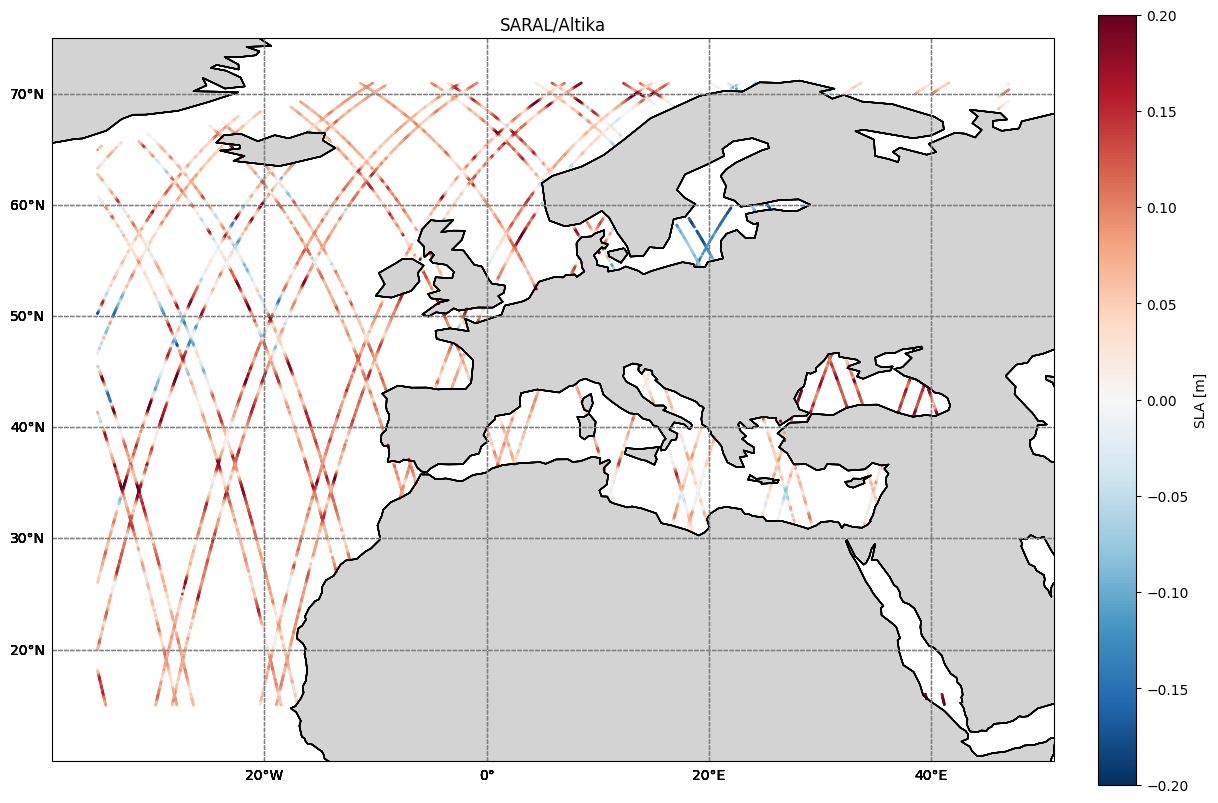

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

for nfile in nfiles_s:
    ds = xr.open_dataset(nfile)
    ax1.coastlines()
    ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
    gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
    gl.top_labels = gl.right_labels = False  # Disable top and right labels
    cc = ax1.scatter(ds.longitude, ds.latitude, s=1, c=ds.sla_filtered, vmin=-0.2, vmax=0.2, cmap='RdBu_r', transform=ccrs.PlateCarree())

plt.ylim([10, 75.])
cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('SLA [m]')
plt.title('SARAL/Altika')
plt.show()

We can see the satellite coverage difference at the north pole. Different orbit set-ups affect not only the temporal coverage but the spatial too.

## 1.3.) Conventional altimetry: Interpolated gridded maps

### 1.3.1.) Reading the data

In [ ]:
filedir = '../content/drive/MyDrive/Altimetry/L4/'

In [ ]:
# We obtain the list of files:
## DT (processed data):
nfiles_L4_dt = sorted(glob(filedir + 'dt_europe_allsat_phy_l4_*.nc'))

In [ ]:
# We explore the first file of the Jason-3 data:
nfile = nfiles_L4_dt[0]
# We load the data:
ds = xr.open_dataset(nfile)
# We explore the variables:
ds

<xarray.Dataset> Size: 17MB
Dimensions:         (time: 1, latitude: 370, nv: 2, longitude: 578)
Coordinates:
  * time            (time) datetime64[ns] 8B 2023-02-01
  * latitude        (latitude) float32 1kB 19.94 20.06 20.19 ... 65.94 66.06
  * longitude       (longitude) float32 2kB -30.06 -29.94 -29.81 ... 41.94 42.06
  * nv              (nv) int32 8B 0 1
Data variables: (12/14)
    crs             int32 4B ...
    lat_bnds        (latitude, nv) float32 3kB ...
    lon_bnds        (longitude, nv) float32 5kB ...
    sla             (time, latitude, longitude) float64 2MB ...
    err_sla         (time, latitude, longitude) float64 2MB ...
    ugosa           (time, latitude, longitude) float64 2MB ...
    ...              ...
    err_vgosa       (time, latitude, longitude) float64 2MB ...
    adt             (time, latitude, longitude) float64 2MB ...
    ugos            (time, latitude, longitude) float64 2MB ...
    vgos            (time, latitude, longitude) float64 2MB ...
    tpa_correction  (time) float64 8B ...
    flag_ice        (time, latitude, longitude) float64 2MB ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Delayed-Time Level-4 sea su...
    time_coverage_duration:          P1D
    time_coverage_end:               2023-02-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-01-31T12:00:00Z
    title:                           DT merged all satellites European Seas G...

In [ ]:
# We explore the variables in detail:
print(ds.adt)

<xarray.DataArray 'adt' (time: 1, latitude: 370, longitude: 578)> Size: 2MB
[213860 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 8B 2023-02-01
  * latitude   (latitude) float32 1kB 19.94 20.06 20.19 ... 65.81 65.94 66.06
  * longitude  (longitude) float32 2kB -30.06 -29.94 -29.81 ... 41.94 42.06
Attributes:
    comment:        The absolute dynamic topography is the sea surface height...
    grid_mapping:   crs
    long_name:      Absolute dynamic topography
    standard_name:  sea_surface_height_above_geoid
    units:          m


### 1.3.2.) Quick visualization:

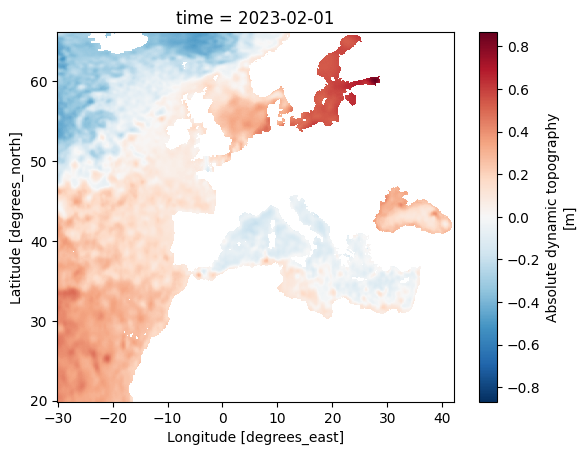

In [ ]:
# We can now do a quick plot:
ds.adt.plot()

As this data is 2D, with this quick plotting function we can better see the data than in the previous case.

### 1.3.3.) Plotting a map of the data

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


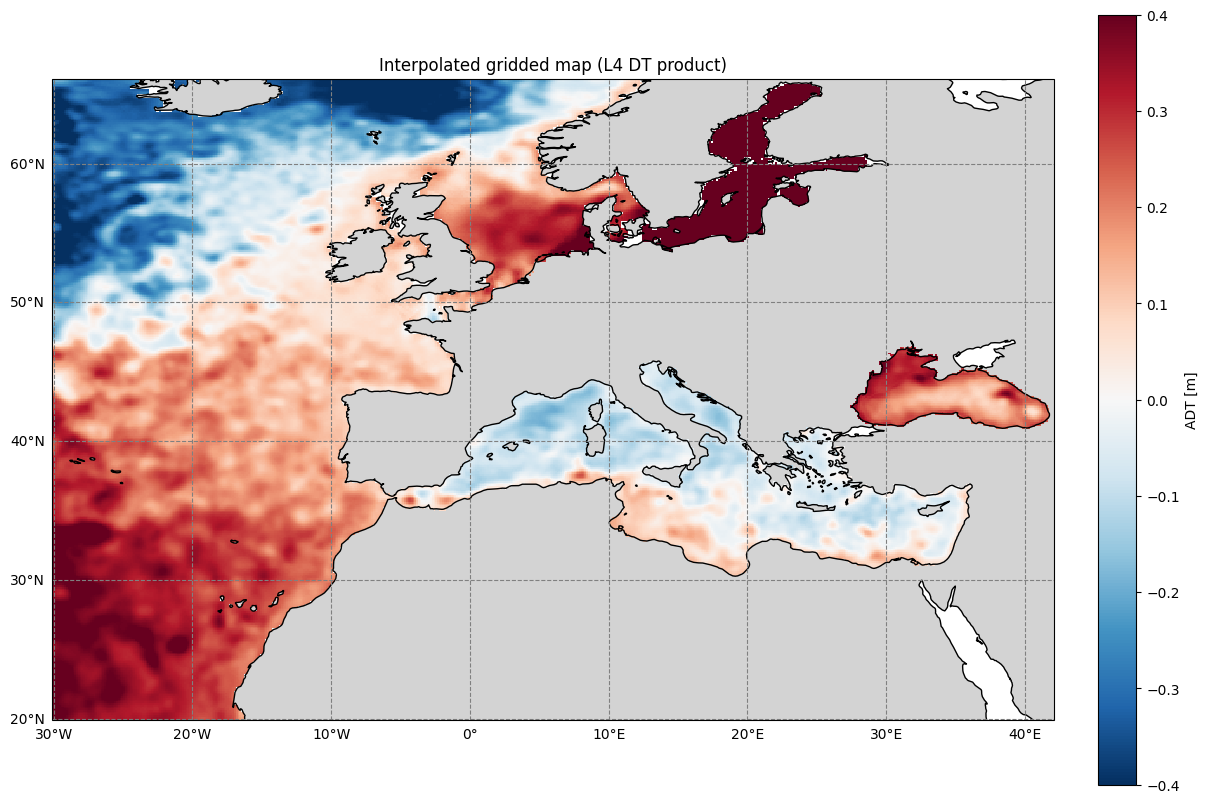

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

nfile = nfiles_L4_dt[0]
ds = xr.open_dataset(nfile)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax1.pcolormesh(ds.longitude, ds.latitude, ds.adt.squeeze(), vmin=-0.4, vmax=0.4, cmap='RdBu_r', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('ADT [m]')
plt.title('Interpolated gridded map (L4 DT product)')
plt.show()

With this altimetric interpolated gridded maps, we can observe some marine currents and dynamical structures like [eddies](https://oceanservice.noaa.gov/facts/eddy.html).

We can also visualize the error associated to the data:

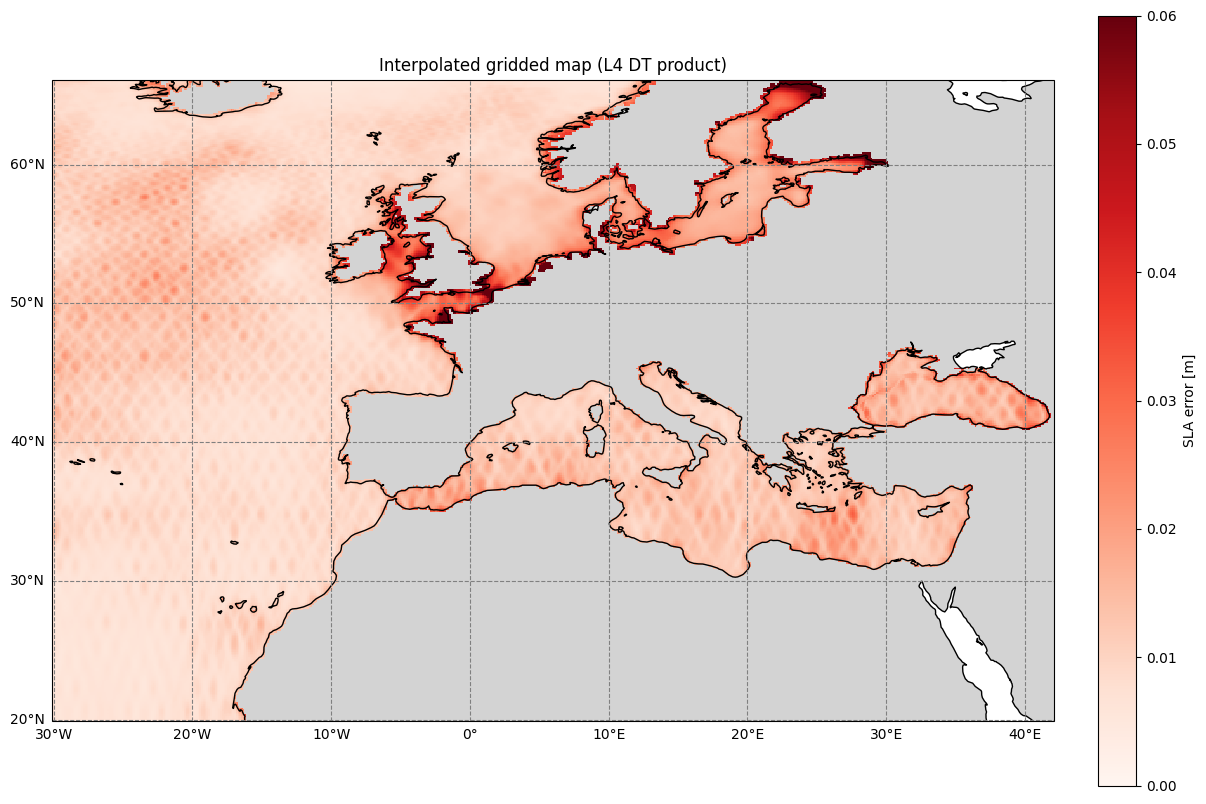

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

nfile = nfiles_L4_dt[0]
ds = xr.open_dataset(nfile)
ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

cc = ax1.pcolormesh(ds.longitude, ds.latitude, ds.err_sla.squeeze(), vmin=0., vmax=0.06, cmap='Reds', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('SLA error [m]')
plt.title('Interpolated gridded map (L4 DT product)')
plt.show()

Above we can see the effect of the presence or not of the satellite tracks. In the zones where there are satellite tracks, the error is lower (lighter coloured areas).  Near the coast, you can also observe higher errors.  In areas of high temporal variability, for example, zones with strong tides like the English Channel, the error is higher.

# 2) SWOT

## 2.1.) Data download:

* SWOT: Obtained from the AVISO platform.
   

## 2.2.) Reading the data

In [ ]:
filedir = '../content/drive/MyDrive/Altimetry/SWOT/'

In [ ]:
# We obtain the list of files:
## SWOT data (L3 version 1.0 prodcut):
nfiles_SWOT_L3 = sorted(glob(filedir + 'SWOT_L3_LR_SSH_Basic_*.nc'))

In [ ]:
# We explore the second file:
nfile = nfiles_SWOT_L3[1]
# We load the data:
ds = xr.open_dataset(nfile)
# We explore the variables:
ds

<xarray.Dataset> Size: 27MB
Dimensions:         (num_lines: 9860, num_pixels: 69, num_nadir: 1354)
Coordinates:
    latitude        (num_lines, num_pixels) float64 5MB ...
    longitude       (num_lines, num_pixels) float64 5MB ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables:
    time            (num_lines) datetime64[ns] 79kB ...
    mdt             (num_lines, num_pixels) float64 5MB ...
    ssha            (num_lines, num_pixels) float64 5MB ...
    ssha_noiseless  (num_lines, num_pixels) float64 5MB ...
    i_num_line      (num_nadir) int16 3kB ...
    i_num_pixel     (num_nadir) int8 1kB ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    geospatial_lat_min:              -78.272132
    geospatial_lat_max:              78.272321
    geospatial_lon_min:              6.5e-05
    geospatial_lon_max:              359.999908
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0 (NASA/CNES). D...
    doi:                             https://doi.org/10.24400/527896/A01-2023...

In [ ]:
# We explore the variables in detail:
print(ds.ssha_noiseless)

<xarray.DataArray 'ssha_noiseless' (num_lines: 9860, num_pixels: 69)> Size: 5MB
[680340 values with dtype=float64]
Coordinates:
    latitude   (num_lines, num_pixels) float64 5MB ...
    longitude  (num_lines, num_pixels) float64 5MB ...
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    comment:        Height of the sea surface anomaly with all corrections ap...
    long_name:      sea surface height anomaly without noise
    standard_name:  sea_surface_height_above_reference_ellipsoid
    units:          m


## 2.3.) Quick visualization:

Here the ssha variable ssha is equivalent to the variable sla that we explored in the previous examples.

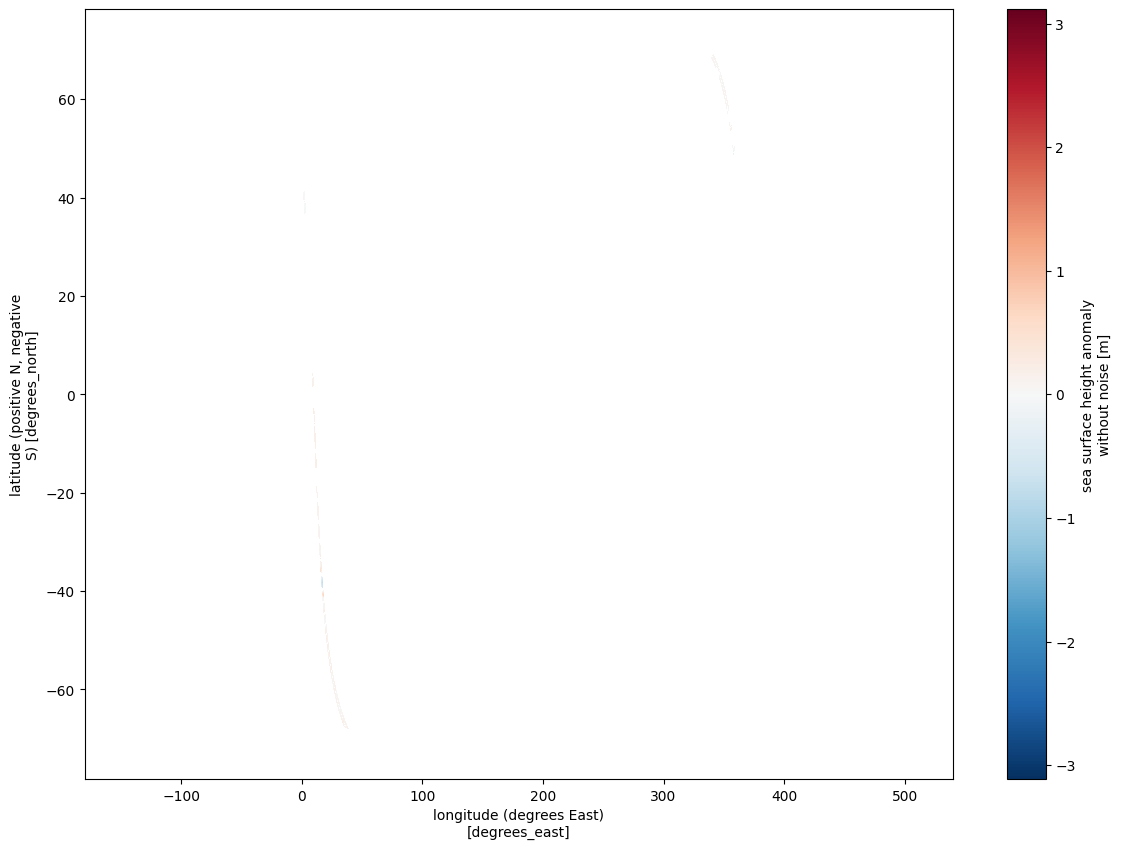

In [ ]:
# We can now do a quick plot:
ds.ssha_noiseless.plot(x='longitude', y='latitude', figsize=(14,10))

In [ ]:
ds.time.mean()

<xarray.DataArray 'time' ()> Size: 8B
array('2023-04-16T08:25:24.526750661', dtype='datetime64[ns]')

We have plotted the variable ssha_noiseless, which is also a filtered variable (like sla_filtered), where the noise of the data is removed.  Here we see the data of pass 16 during the fast-sampling phase of the SWOT satellite on the 16/04/2023, which corresponds to cycle 492.

What is a satellite pass and cycle? Check it out [here](https://natural-resources.canada.ca/maps-tools-and-publications/satellite-imagery-elevation-data-and-air-photos/tutorial-fundamentals-remote-sensing/satellites-and-sensors/satellite-characteristics-orbits-and-swaths/9283).

## 2.4.) Plotting a map of the data

We plot the Absolute Dynamic Topography (ADT) variable, and let's see if we can spot some oceanic structures!

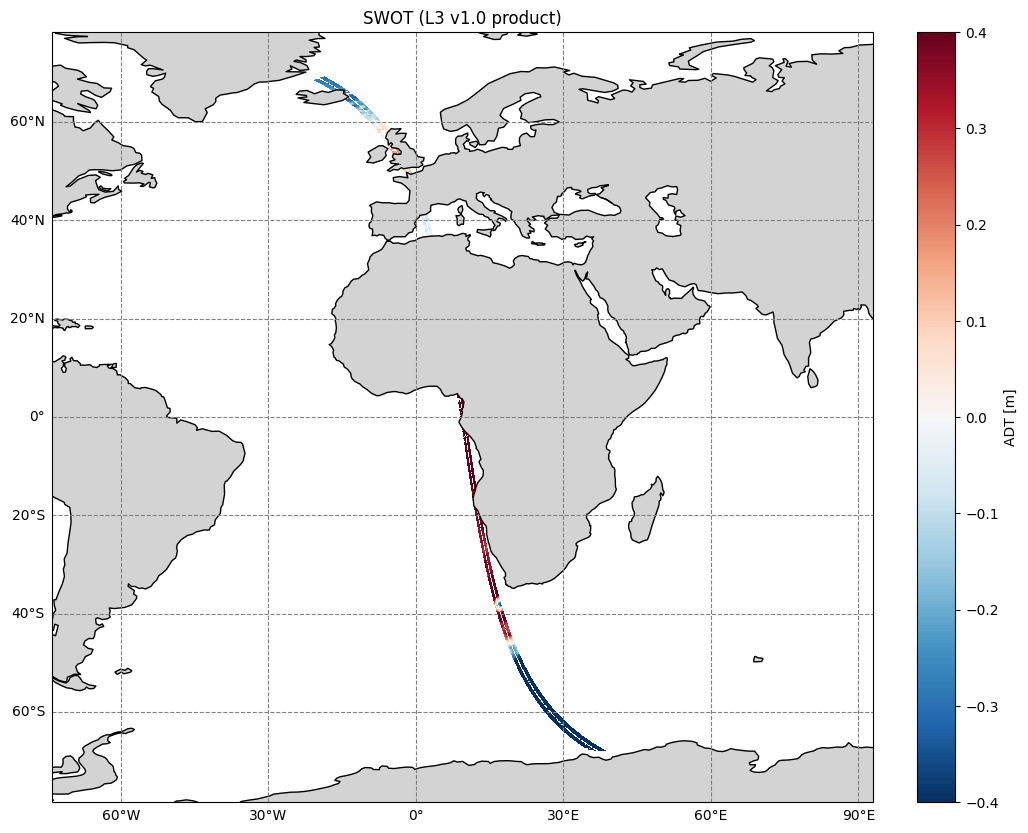

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

adt_SWOT = ds.ssha_noiseless + ds.mdt # calculamos la ADT
cc = ax1.pcolormesh(ds.longitude, ds.latitude, adt_SWOT, vmin=-0.4, vmax=0.4, cmap='RdBu_r', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('ADT [m]')
plt.title('SWOT (L3 v1.0 product)')
plt.show()

With 2D along-track data, we can already observe some structures without having to obtain the interpolated gridded maps, like for example the eddy south of South  Africa.  This is called an Agulhas ring.

Let's zoom in to see it more in detail:

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


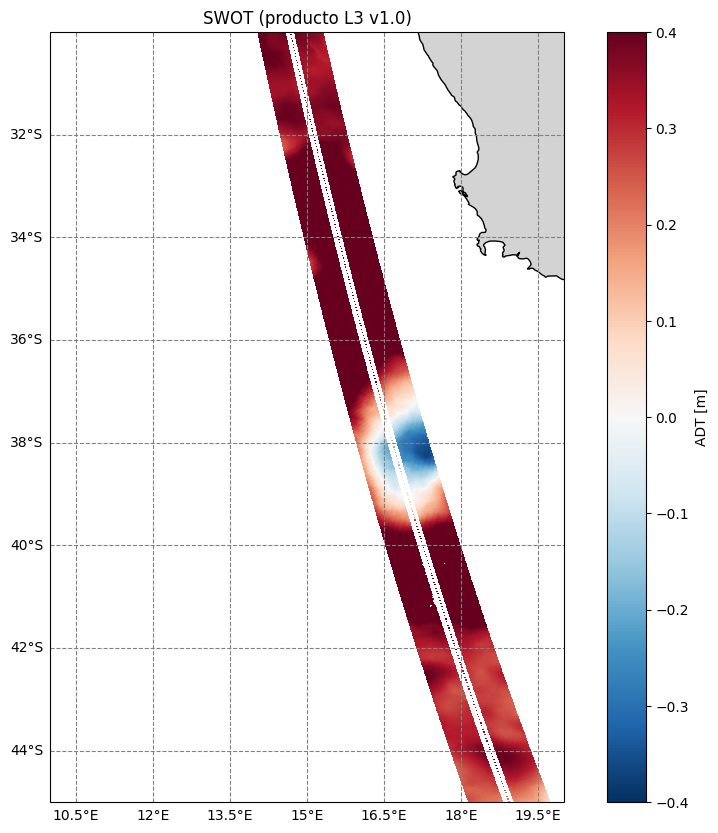

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

ax1.set_extent([10, 20, -45, -30]) # lon_min, lon_max, lat_min, lat_max

adt_SWOT = ds.ssha_noiseless + ds.mdt # calculamos la ADT
cc = ax1.pcolormesh(ds.longitude, ds.latitude, adt_SWOT, vmin=-0.4, vmax=0.4, cmap='RdBu_r', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('ADT [m]')
plt.title('SWOT (L3 v1.0 product)')
plt.show()

Lastly, let's zoom into the western Mediterranean Sea:

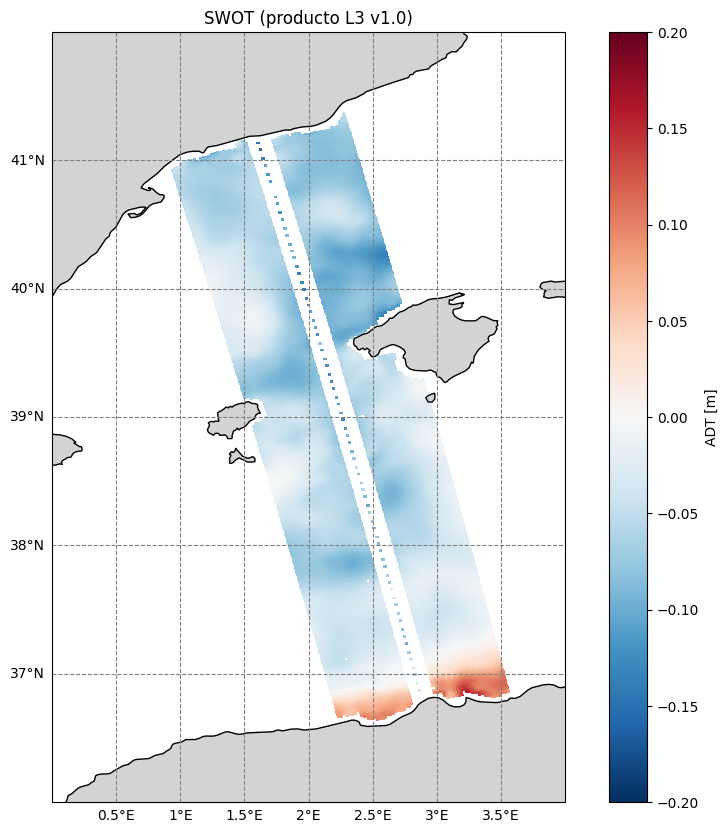

In [ ]:
fig = plt.figure(figsize=(14,10)) #(17,5)
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

ax1.coastlines()
ax1.add_feature(cartopy.feature.LAND, facecolor='lightgrey')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray')
gl.top_labels = gl.right_labels = False  # Disable top and right labels

ax1.set_extent([0, 4, 36, 42]) # lon_min, lon_max, lat_min, lat_max

adt_SWOT = ds.ssha_noiseless + ds.mdt # we calculate the ADT
cc = ax1.pcolormesh(ds.longitude, ds.latitude, adt_SWOT, vmin=-0.2, vmax=0.2, cmap='RdBu_r', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cc, ax=ax1, orientation='vertical', fraction=0.036, pad=0.04)
cbar.set_label('ADT [m]')
plt.title('SWOT (L3 v1.0 product)')
plt.show()